<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,34.039569,98.129032,-0.039551,142.129050,142.170539,-0.041489
1,0.0,1.0,36.408337,53.836763,0.036797,100.281897,100.253050,0.028847
2,0.0,2.0,83.217118,55.293551,-0.002400,148.508269,148.506500,0.001769
3,0.0,3.0,32.037111,45.495794,0.075198,87.608103,87.543212,0.064891
4,0.0,4.0,44.023048,83.052717,-0.016682,137.059084,137.077417,-0.018333
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.778575,58.357507,-0.027221,150.108861,150.149185,-0.040324
29996,999.0,26.0,79.636371,83.413491,0.013101,173.062964,173.061698,0.001265
29997,999.0,27.0,99.075848,34.420252,0.036074,143.532174,143.518538,0.013636
29998,999.0,28.0,66.487065,52.652562,-0.050272,129.089355,129.144614,-0.055259


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    34.039569  98.129032 -0.039551  142.129050  142.170539 -0.041489
      1.0    36.408337  53.836763  0.036797  100.281897  100.253050  0.028847
      2.0    83.217118  55.293551 -0.002400  148.508269  148.506500  0.001769
      3.0    32.037111  45.495794  0.075198   87.608103   87.543212  0.064891
      4.0    44.023048  83.052717 -0.016682  137.059084  137.077417 -0.018333
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.778575  58.357507 -0.027221  150.108861  150.149185 -0.040324
      26.0   79.636371  83.413491  0.013101  173.062964  173.061698  0.001265
      27.0   99.075848  34.420252  0.036074  143.532174  143.518538  0.013636
      28.0   66.487065  52.652562 -0.050272  129.089355  129.144614 -0.055259
      29.0   32.776912  77.566954 -0.007810  120.336057  120.330771  0.005286

[30000 rows x 6 columns]

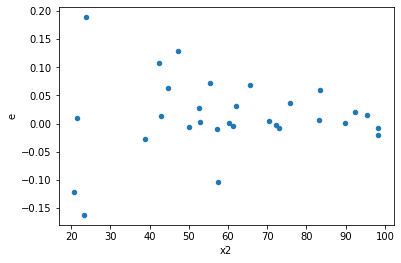

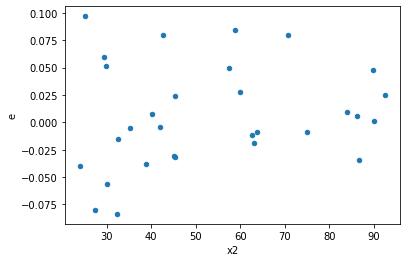

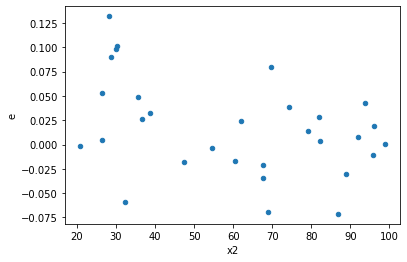

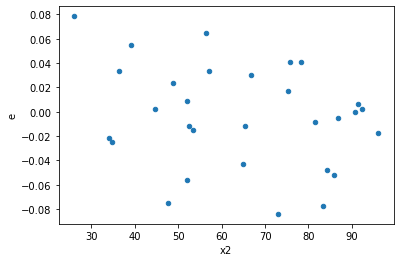

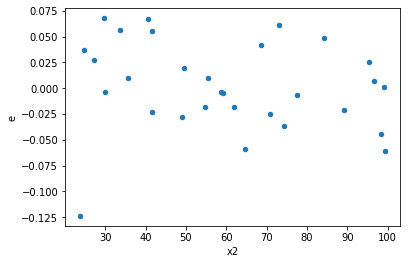

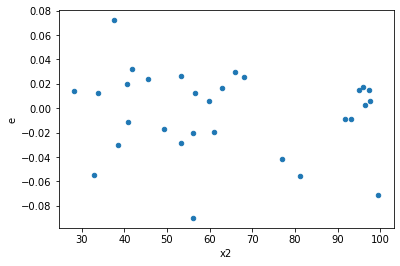

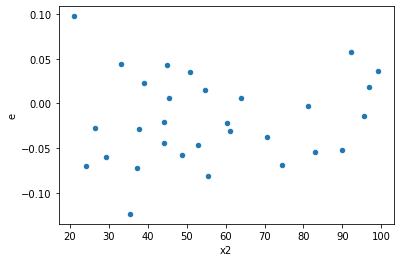

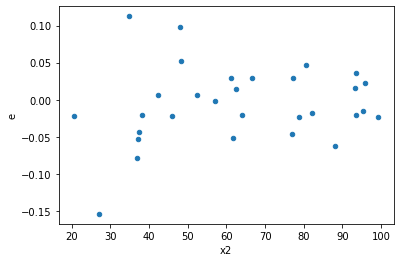

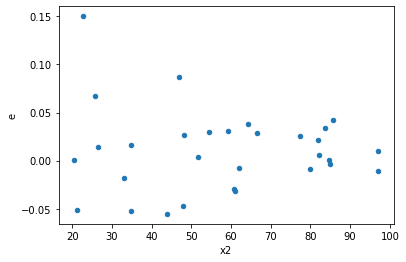

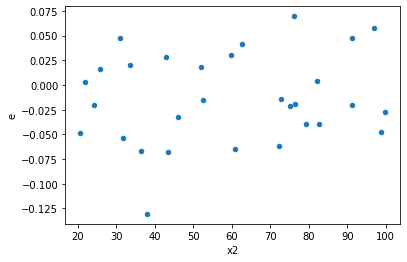

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,0.008809068410232644,0.011244242797073952,0.0008809068410232645,0.0011244242797073952,1.2764394909242163,0.7069544084118138,0.6465227957940931,0.3534772042059069,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,0.006338802357730717,0.012203890583838941,0.0006338802357730717,0.0012203890583838942,1.9252675655607472,0.3165232973152803,0.8417383513423599,0.15826164865764014,Reject005=1 : Homoscedasticity
14.0,10.0,10.0,0.009339944457039328,0.011738933149320145,0.0009339944457039328,0.0011738933149320146,1.2568525651641052,0.7247015317175229,0.6376492341412385,0.36235076585876147,Reject005=1 : Homoscedasticity
19.0,10.0,10.0,0.015682550151902317,0.01797256033109157,0.0015682550151902316,0.001797256033109157,1.1460228188023025,0.8335787081193682,0.5832106459403159,0.4167893540596841,Reject005=1 : Homoscedasticity
45.0,10.0,10.0,0.006326437510086998,0.016398825282023737,0.0006326437510086998,0.0016398825282023736,2.5921105291686075,0.14898478002607707,0.9255076099869615,0.07449239001303853,Reject005=1 : Homoscedasticity
53.0,10.0,10.0,0.015101843341797198,0.016869034457831677,0.0015101843341797198,0.0016869034457831678,1.1170182391670986,0.8645242415596712,0.5677378792201644,0.4322621207798356,Reject005=1 : Homoscedasticity
71.0,10.0,10.0,0.0067486120051635,0.010163899626148052,0.00067486120051635,0.0010163899626148053,1.5060725995762458,0.52909004207338,0.73545497896331,0.26454502103669,Reject005=1 : Homoscedasticity
72.0,10.0,10.0,0.007109978344245436,0.009066992903197455,0.0007109978344245437,0.0009066992903197455,1.2752490182387062,0.7080206491573717,0.6459896754213141,0.35401032457868586,Reject005=1 : Homoscedasticity
76.0,10.0,10.0,0.02039662623907809,0.030316200378405368,0.0020396626239078093,0.0030316200378405368,1.4863340644210201,0.5423596957075119,0.7288201521462441,0.27117984785375593,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.008809068410232644,0.011244242797073952,0.0008809068410232645,0.0011244242797073952,1.2764394909242163,0.7069544084118138,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,0.05319016997109071,0.005551531216406812,0.005319016997109071,0.0005551531216406812,0.10437137575277752,0.0013701879356697536,Reject005=0 : Heteroscedasticity
2.0,10.0,10.0,0.038750758316220754,0.008034130694631872,0.0038750758316220754,0.0008034130694631872,0.20732834772084574,0.020389092958115394,Reject005=0 : Heteroscedasticity
3.0,10.0,10.0,0.006338802357730717,0.012203890583838941,0.0006338802357730717,0.0012203890583838942,1.9252675655607472,0.3165232973152803,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,0.04281008893242549,0.0026724244595927624,0.004281008893242549,0.00026724244595927624,0.062425108805802966,0.00014444129036657384,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,0.053094653919259265,0.010437738528016416,0.005309465391925927,0.0010437738528016416,0.196587372881063,0.016811013253930196,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,0.007891618135416539,0.006391008405087124,0.0007891618135416539,0.0006391008405087124,0.8098476504337081,0.7452085900334564,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,0.016706490127133152,0.008087461309086543,0.0016706490127133152,0.0008087461309086543,0.4840909878461921,0.2682049786055648,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,0.01176497563780221,0.002801208858843348,0.0011764975637802212,0.00028012088588433477,0.23809729361807971,0.03317088455543018,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      634
Reject005=0 : Heteroscedasticity    366
Name: Result_test, dtype: int64